#Machine learning example
https://keithselover.wordpress.com/2016/12/13/machine-learning-for-stock-market-prediction-global-indices/



In [8]:
%matplotlib inline
import pylab
import pandas as pd
import pandas.io.data
import numpy as np
import quandl
import sklearn
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import metrics
from sklearn import neighbors
from sklearn import cross_validation
pylab.rcParams['figure.figsize'] = (12, 8)

In [9]:
djia = quandl.get('YAHOO/INDEX_DJI', transformation="rdiff")
dax_f = quandl.get('CHRIS/EUREX_FDAX1', transformation="rdiff")
dax = quandl.get('YAHOO/INDEX_GDAXI', transformation="rdiff")
nk = quandl.get('YAHOO/INDEX_N225', transformation="rdiff")
sse = quandl.get('YAHOO/L_SSE', transformation="rdiff")
eur = quandl.get('FED/RXI_US_N_B_EU', transformation="rdiff")
aud = quandl.get('FED/RXI_US_N_B_AL', transformation="rdiff")
oil = quandl.get('CHRIS/ICE_B2', transformation="rdiff")

In [10]:
start = '2000-1-1'
end = '2013-1-1'
ftse = pd.io.data.get_data_yahoo('^FTSE', start, end)
ftse.Volume = ftse.Volume.astype(float)
ftse = ftse.pct_change()

In [11]:
df = pd.DataFrame([djia['Adjusted Close'], dax_f.Settle, dax['Adjusted Close'],
                   nk['Adjusted Close'], sse['Adjusted Close'], ftse['Adj Close'],
                   eur.Value, aud.Value, oil.Settle],
                 index = ['DJIA','DAX FUT','DAX', 'NK', 'SSE','FTSE','EUR','AUD','OIL']) 
 
df = df.transpose()
df = df.loc['20000104':'20130101']
df = df.dropna()

In [20]:
df = pd.DataFrame([djia['Adjusted Close'], dax_f.Settle, dax['Adjusted Close'],
                   nk['Adjusted Close'], sse['Adjusted Close'], ftse['Adj Close'],
                   eur.Value, aud.Value, oil.Settle],
                 index = ['DJIA','DAX FUT','DAX', 'NK', 'SSE','FTSE','EUR','AUD','OIL']) 
df.plot()

In [12]:
def trend(val):
    if (val > 0):
        return 1
    elif (val <= 0):
        return 0
 
df['Move'] = df['DJIA'].apply(trend)
df = df.dropna()

In [13]:
labels = []
scores = []
Y = df['Move']
for c in df.columns:
    if (c != 'Move' and c!= 'DJIA'):
        X = pd.DataFrame([df[c]]).transpose()
 
        X_train = X[:int(len(X)*.8)]
        Y_train = Y[:int(len(X)*.8)]
        X_test = X[int(len(X)*.8):]
        Y_test = Y[int(len(X)*.8):]
 
        knn = neighbors.KNeighborsClassifier(n_neighbors=25)
        knn.fit(X_train, Y_train)
        predicted = knn.predict(X_test)
 
        print(c)
        print(metrics.f1_score(Y_test, predicted))
        print(knn.score(X_test, Y_test))
        labels.append(c)
        scores.append(knn.score(X_test, Y_test))

DAX FUT
0.746268656716
0.717607973422
DAX
0.725111441308
0.6926910299
NK
0.532507739938
0.498338870432
SSE
0.601208459215
0.56146179402
FTSE
0.707547169811
0.691029900332
EUR
0.466876971609
0.43853820598
AUD
0.576980568012
0.529900332226
OIL
0.52743902439
0.485049833887


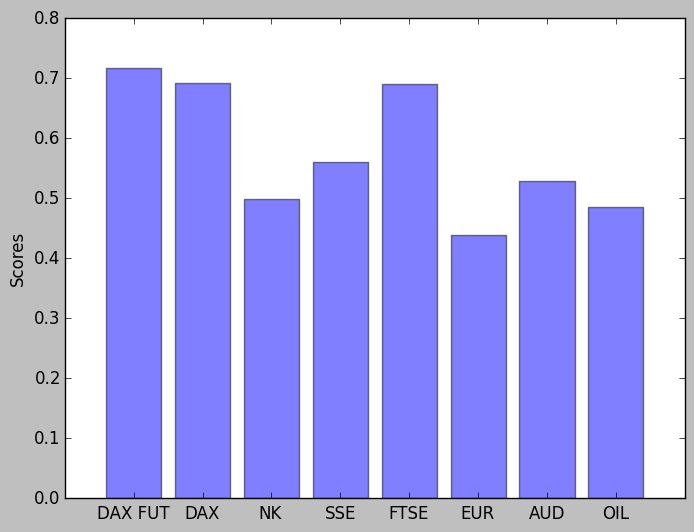

In [14]:
y_pos = np.arange(len(labels))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Scores')
 
plt.show()

#Logistic Regression

In [15]:
X2 = df.copy()
Y = df['Move']
del X2['Move']
del X2['DJIA']
 
X_train = X2[:int(len(X2)*.8)]
Y_train = Y[:int(len(X2)*.8)]
X_test = X2[int(len(X2)*.8):]
Y_test = Y[int(len(X2)*.8):]
 
logit = linear_model.LogisticRegression(C=1)
logit.fit(X_train, Y_train)
predicted = logit.predict(X_test)
print(metrics.f1_score(Y_test, predicted))
print(logit.score(X_test,Y_test))

0.768
0.71096345515


#KNN 

In [16]:
X2 = df.copy()
Y = df['Move']
del X2['Move']
del X2['DJIA']
 
X_train = X2[:int(len(X2)*.8)]
Y_train = Y[:int(len(X2)*.8)]
X_test = X2[int(len(X2)*.8):]
Y_test = Y[int(len(X2)*.8):]
 
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)
print(metrics.f1_score(Y_test, predicted))
print(knn.score(X_test,Y_test))

0.751857355126
0.722591362126


#Gaussian Naive Bayes

In [17]:
X2 = df.copy()
Y = df['Move']
del X2['Move']
del X2['DJIA']
 
X_train = X2[:int(len(X2)*.8)]
Y_train = Y[:int(len(X2)*.8)]
X_test = X2[int(len(X2)*.8):]
Y_test = Y[int(len(X2)*.8):]
 
clf = GaussianNB()
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)
print(metrics.f1_score(Y_test, predicted))
print(clf.score(X_test,Y_test))

0.765193370166
0.717607973422
